Coleta de Dados MongoDB com R

In [1]:
install.packages('mongolite')

package 'mongolite' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'mongolite'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\regia\Anaconda3\envs\dev\Lib\R\library\00LOCK\mongolite\libs\x64\mongolite.dll to C:\Users\regia\Anaconda3\envs\dev\Lib\R\library\mongolite\libs\x64\mongolite.dll: Permission denied"Warning message:
"restored 'mongolite'"


The downloaded binary packages are in
	C:\Users\regia\AppData\Local\Temp\Rtmpw1kz6B\downloaded_packages


In [2]:
require(mongolite)

Loading required package: mongolite
Warning message:
"package 'mongolite' was built under R version 3.6.3"

In [3]:
iris <- mongo(collection = 'igti', db = 'igti', url = 'mongodb://localhost')

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp


In [4]:
pessoas <- mongo(collection='pessoas', db='igti', url='mongodb://localhost')
str <- c('{"nome" : "maria"}', '{"nome" : "ana", "idade" : 23}', '{"nome" : "joão"}')
pessoas$insert(str)

List of 6
 $ nInserted  : int 3
 $ nMatched   : int 0
 $ nModified  : int 0
 $ nRemoved   : int 0
 $ nUpserted  : int 0
 $ writeErrors: list()

In [5]:
pessoas$find()

nome,idade
maria,NA
ana,23
joão,NA


In [6]:
pessoas$count()

[1] 3

In [7]:
pessoas$remove('{"idade": 23}')
pessoas$count()

[1] 2

In [8]:
pessoas$find()

nome
maria
joão


In [9]:
str <- c('{"nome" : "bill"}', '{"nome": "anna", "idade": 23}', '{"nome" : "jose", "idade" : 35}')
pessoas$insert(str)

List of 6
 $ nInserted  : int 3
 $ nMatched   : int 0
 $ nModified  : int 0
 $ nRemoved   : int 0
 $ nUpserted  : int 0
 $ writeErrors: list()

In [10]:
pessoas$find()

nome,idade
maria,NA
joão,NA
bill,NA
anna,23
jose,35


In [11]:
pessoas$update('{"nome" : "bill"}', '{"$set":{"idade" : 21}}')
pessoas$find()

List of 3
 $ modifiedCount: int 1
 $ matchedCount : int 1
 $ upsertedCount: int 0

nome,idade
maria,NA
joão,NA
bill,21
anna,23
jose,35


Aula 3.5. Coleta de dados NoSQL: Exemplo utilizando a linguagem R

In [4]:
pessoas <- mongo(collection = 'pessoas', db = 'igti', url = 'mongodb://localhost')

In [5]:
pessoas$count()

[1] 5

In [6]:
pessoas.df <-pessoas$find()

In [7]:
print(paste('Número de colunas: ', ncol(pessoas.df)))
print(paste('Número de linhas: ', nrow(pessoas.df)))
print(paste('Tamanho: ', length(pessoas.df)))

[1] "Número de colunas:  2"
[1] "Número de linhas:  5"
[1] "Tamanho:  2"


In [8]:
head(pessoas.df)

nome,idade
maria,NA
joão,NA
bill,21
anna,23
jose,35


In [9]:
print(rownames(pessoas.df))

[1] "1" "2" "3" "4" "5"


In [10]:
print(colnames(pessoas.df))

[1] "nome"  "idade"


In [13]:
write.csv(pessoas.df, 'C:/DataScience/BootCamp/Datasets/CSV/pessoasFromMongo.csv', row.names=FALSE)

In [14]:
pessoas.df2 <- pessoas.df
head(pessoas.df2)

nome,idade
maria,NA
joão,NA
bill,21
anna,23
jose,35


In [15]:
print(colnames(pessoas.df2))

[1] "nome"  "idade"


In [ ]:
# remover colunas
#pessoas.df2$Id <- NULL

In [17]:
# Renomear colunas
colnames(pessoas.df2)[1] <- "name"
colnames(pessoas.df2)[2] <- "age"
print(colnames(pessoas.df2))

[1] "name" "age" 


In [18]:
# Equivalente ao shape no Python
summary(pessoas.df2)

     name                age       
 Length:5           Min.   :21.00  
 Class :character   1st Qu.:22.00  
 Mode  :character   Median :23.00  
                    Mean   :26.33  
                    3rd Qu.:29.00  
                    Max.   :35.00  
                    NA's   :2      

Warning message in plot.window(xlim, ylim, log = log, ...):
""xlam" is not a graphical parameter"Warning message in axis(if (horiz) 2 else 1, at = at.l, labels = names.arg, lty = axis.lty, :
""xlam" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""xlam" is not a graphical parameter"Warning message in axis(if (horiz) 1 else 2, cex.axis = cex.axis, ...):
""xlam" is not a graphical parameter"

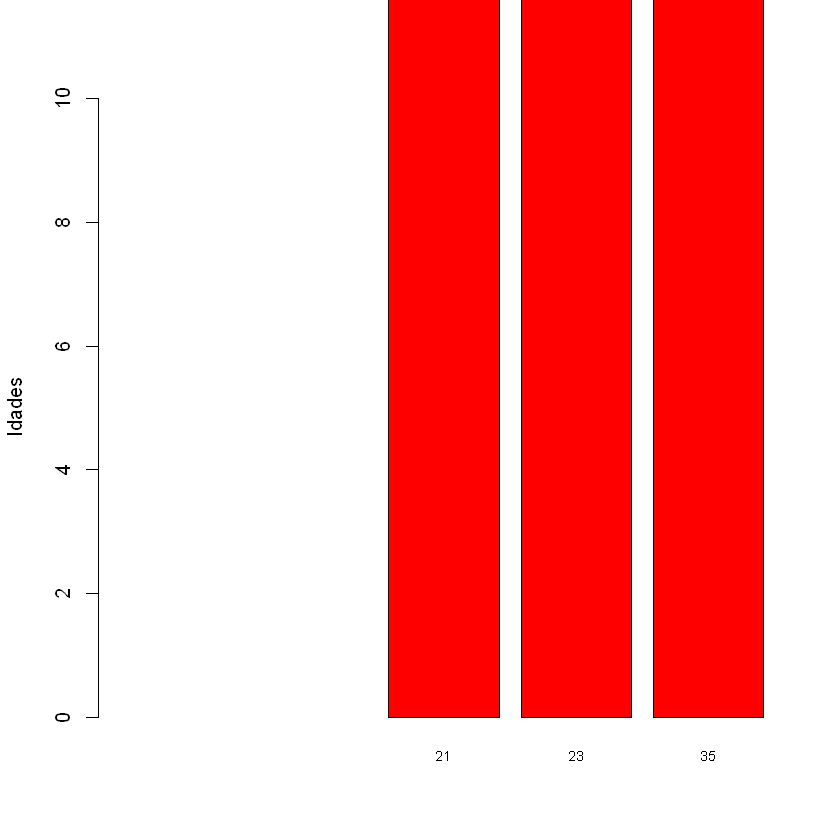

In [24]:
barplot(pessoas.df2$age,  ylab="Idades", xlam="Nome",
       names=as.character(pessoas.df2$age),cex.names=0.7, 
       ylim=c(0,10), col=2)

In [25]:
pessoas$export(stdout())

{ "_id" : { "$oid" : "5f25749ef35a000058006012" }, "nome" : "maria" }
{ "_id" : { "$oid" : "5f25749ef35a000058006014" }, "nome" : "joão" }
{ "_id" : { "$oid" : "5f257571f35a000058006015" }, "nome" : "bill", "idade" : 21 }
{ "_id" : { "$oid" : "5f257571f35a000058006016" }, "nome" : "anna", "idade" : 23 }
{ "_id" : { "$oid" : "5f257571f35a000058006017" }, "nome" : "jose", "idade" : 35 }


In [27]:
pessoas$export(file('dumpPessoas.json'))

In [28]:
pessoas$export(file('C:/DataScience/BootCamp/Datasets/JSON/dumpPessoas.json'))

In [29]:
pessoasDump <- mongo(collection = 'pessoasDump', db = 'igti', url='mongodb://localhost')

In [31]:
# Importar
pessoasDump$import(file('C:/DataScience/BootCamp/Datasets/JSON/dumpPessoas.json'))

In [32]:
pessoasDump$count()

[1] 5

In [34]:
pessoasDump$find(limit=3)

nome,idade
maria,NA
joão,NA
bill,21


In [35]:
rm(pessoasDump)

In [36]:
pessoas$disconnect()

In [37]:
pessoas$disconnect(gc = TRUE)